In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Housing Prices - My First Approach

My first approach on the Housing Prices problem.

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## 1.Importing Dataset

In [128]:
df_train_raw = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv').set_index('Id')
df_test_raw = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv').set_index('Id')

In [129]:
df_train_raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [130]:
df_train = df_train_raw.copy()
df_test = df_test_raw.copy()

In [131]:
print(f"df_train shape: {df_train.shape}")
print(f"df_test shape: {df_test.shape}")

df_train shape: (1460, 80)
df_test shape: (1459, 79)


In [132]:
# Join Test and Train for EDA purposes

X_all = pd.concat([df_train.drop(["SalePrice"], axis=1),df_test])
print(f"X_all shape: {X_all.shape}")

X_all shape: (2919, 79)


## 2.Exploratory Analysis (EDA)

In [133]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [134]:
with open('/kaggle/input/home-data-for-ml-course/data_description.txt') as f:
    #print(f.read())
    pass

### 2.1.Prior Data Processing

From description, '**MSSubClass**' should be categorical rather than numerical

In [135]:
# Transformations of Type

# from description, MSSubClass is categorical rather than numerical
X_all["MSSubClass"] = X_all["MSSubClass"].astype(str)
df_train["MSSubClass"] = df_train["MSSubClass"].astype(str)
df_test["MSSubClass"] = df_test["MSSubClass"].astype(str)

'**Pool QC**' has only 7 non-null values out of 1460. '**MiscFeature**' has also only 54 non-null out of 1468

In [136]:
print("Pool QC Describe:\n")
print(X_all["PoolQC"].describe())

print("\nUnique Values:")
print(X_all["PoolQC"].unique())

print("Pool QC Describe:\n")
print(X_all["MiscFeature"].describe())

print("\nUnique Values:")
print(X_all["MiscFeature"].unique())



Pool QC Describe:

count     10
unique     3
top       Ex
freq       4
Name: PoolQC, dtype: object

Unique Values:
[nan 'Ex' 'Fa' 'Gd']
Pool QC Describe:

count      105
unique       4
top       Shed
freq        95
Name: MiscFeature, dtype: object

Unique Values:
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


Some columns have nan values which should have been a category itself rather than nan. We will label them '**NA**'

In [137]:
revise_nan_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                   'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                   'PoolQC', 'Fence', 'MiscFeature']
for index,col in enumerate(revise_nan_cols):
    print(f"\n{col}:\n")
    print(X_all[col].describe())

    print(f"\nUnique Values:")
    print(X_all[col].unique())


Alley:

count      198
unique       2
top       Grvl
freq       120
Name: Alley, dtype: object

Unique Values:
[nan 'Grvl' 'Pave']

BsmtQual:

count     2838
unique       4
top         TA
freq      1283
Name: BsmtQual, dtype: object

Unique Values:
['Gd' 'TA' 'Ex' nan 'Fa']

BsmtCond:

count     2837
unique       4
top         TA
freq      2606
Name: BsmtCond, dtype: object

Unique Values:
['TA' 'Gd' nan 'Fa' 'Po']

BsmtExposure:

count     2837
unique       4
top         No
freq      1904
Name: BsmtExposure, dtype: object

Unique Values:
['No' 'Gd' 'Mn' 'Av' nan]

BsmtFinType1:

count     2840
unique       6
top        Unf
freq       851
Name: BsmtFinType1, dtype: object

Unique Values:
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

BsmtFinType2:

count     2839
unique       6
top        Unf
freq      2493
Name: BsmtFinType2, dtype: object

Unique Values:
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

FireplaceQu:

count     1499
unique       5
top         Gd
freq       744
Name: FireplaceQu

'**MasVnrType**' is the same case but it is labeled to 'None'

In [138]:
print("MasVnrType Describe:\n")
print(X_all["MasVnrType"].describe())

print("\nUnique Values:")
print(X_all["MasVnrType"].unique())

MasVnrType Describe:

count        1153
unique          3
top       BrkFace
freq          879
Name: MasVnrType, dtype: object

Unique Values:
['BrkFace' nan 'Stone' 'BrkCmn']


In [139]:
# Fill NaN as category NA (as defined in the problem statement)

X_all[revise_nan_cols]= X_all[revise_nan_cols].fillna('NA')
df_train[revise_nan_cols] = df_train[revise_nan_cols].fillna('NA')
df_test[revise_nan_cols] = df_test[revise_nan_cols].fillna('NA')

# Only "MasVnrType" should be None (as defined in the problem statement)

X_all["MasVnrType"]= X_all["MasVnrType"].fillna('None')
df_train["MasVnrType"] = df_train["MasVnrType"].fillna('None')
df_test["MasVnrType"] = df_test["MasVnrType"].fillna('None')

X_all[revise_nan_cols + ["MasVnrType"]].head(5)

,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType
Id,,,,,,,,,,,,,,,
1,NA,Gd,TA,No,GLQ,Unf,NA,Attchd,RFn,TA,TA,NA,NA,NA,BrkFace
2,NA,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NA,NA,NA,None
3,NA,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NA,NA,NA,BrkFace
4,NA,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NA,NA,NA,None
5,NA,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NA,NA,NA,BrkFace


Some data although seem to be categorical they are rather **ordinal**. We'll create a mapping from the categorical values to the ordinal numbers for each case.

In [140]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

ordinal_cols = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ordinal_cols:
    X_all[col] = X_all[col].map(ordinal_map)
    df_train[col] = df_train[col].map(ordinal_map)
    df_test[col] = df_test[col].map(ordinal_map)
    
fin_cols = ['BsmtFinType1','BsmtFinType2']
for col in fin_cols:
    X_all[col] = X_all[col].map(fintype_map)
    df_train[col] = df_train[col].map(fintype_map)
    df_test[col] = df_test[col].map(fintype_map)

X_all['BsmtExposure'] = X_all['BsmtExposure'].map(expose_map)
df_train['BsmtExposure'] = df_train['BsmtExposure'].map(expose_map)
df_test['BsmtExposure'] = df_test['BsmtExposure'].map(expose_map)

X_all['Fence'] = X_all['Fence'].map(fence_map)
df_train['Fence'] = df_train['Fence'].map(fence_map)
df_test['Fence'] = df_test['Fence'].map(fence_map)

X_all[ordinal_cols + fin_cols + ['BsmtExposure'] +  ['Fence']].head(5)

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,FireplaceQu,BsmtFinType1,BsmtFinType2,BsmtExposure,Fence
Id,,,,,,,,,,,,,
1,4,3,4,3,5,4.0,3,3,0,6,1,1,0
2,3,3,4,3,5,3.0,3,3,3,5,1,4,0
3,4,3,4,3,5,4.0,3,3,3,6,1,2,0
4,3,3,3,4,4,4.0,3,3,4,5,1,1,0
5,4,3,4,3,5,4.0,3,3,3,6,1,3,0


In [141]:
a = X_all.isna().sum(axis = 0)
a[a > 0]

MSZoning          4
LotFrontage     486
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt     159
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

Now, we will separate the columns in **numerical** and **categorical**.

In [142]:
# Identify Numerical, Categorical and Target Column

numerical_cols = [c for c in X_all.select_dtypes(exclude=['object']).columns if c != 'SalePrice']
categorical_cols = [c for c in X_all.select_dtypes(include=['object']).columns if c != 'SalePrice']
target_col = ['SalePrice']

print(f"Numerical Columns: {len(numerical_cols)} columns\n")
print(numerical_cols)

print(f"\nCategorical Columns: {len(categorical_cols)} columns\n")
print(categorical_cols)

print(f"\nTarget Column:\n")
print(target_col)

Numerical Columns: 48 columns

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold']

Categorical Columns: 31 columns

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heat

### 2.2.Numerical Columns

In [143]:
# Look at NUMERICAL
X_all[numerical_cols].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold
count,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,3.396711,3.085646,3.477561,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,0.580678,50.825968,6.213087,2007.792737
std,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,0.580293,0.372361,0.905448,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,1.217413,567.402211,2.714762,1.314964
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,3.000000,3.000000,4.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,4.000000,3.000000,4.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,5.000000,5.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,4.000000,17000.000000,12.000000,2010.000000


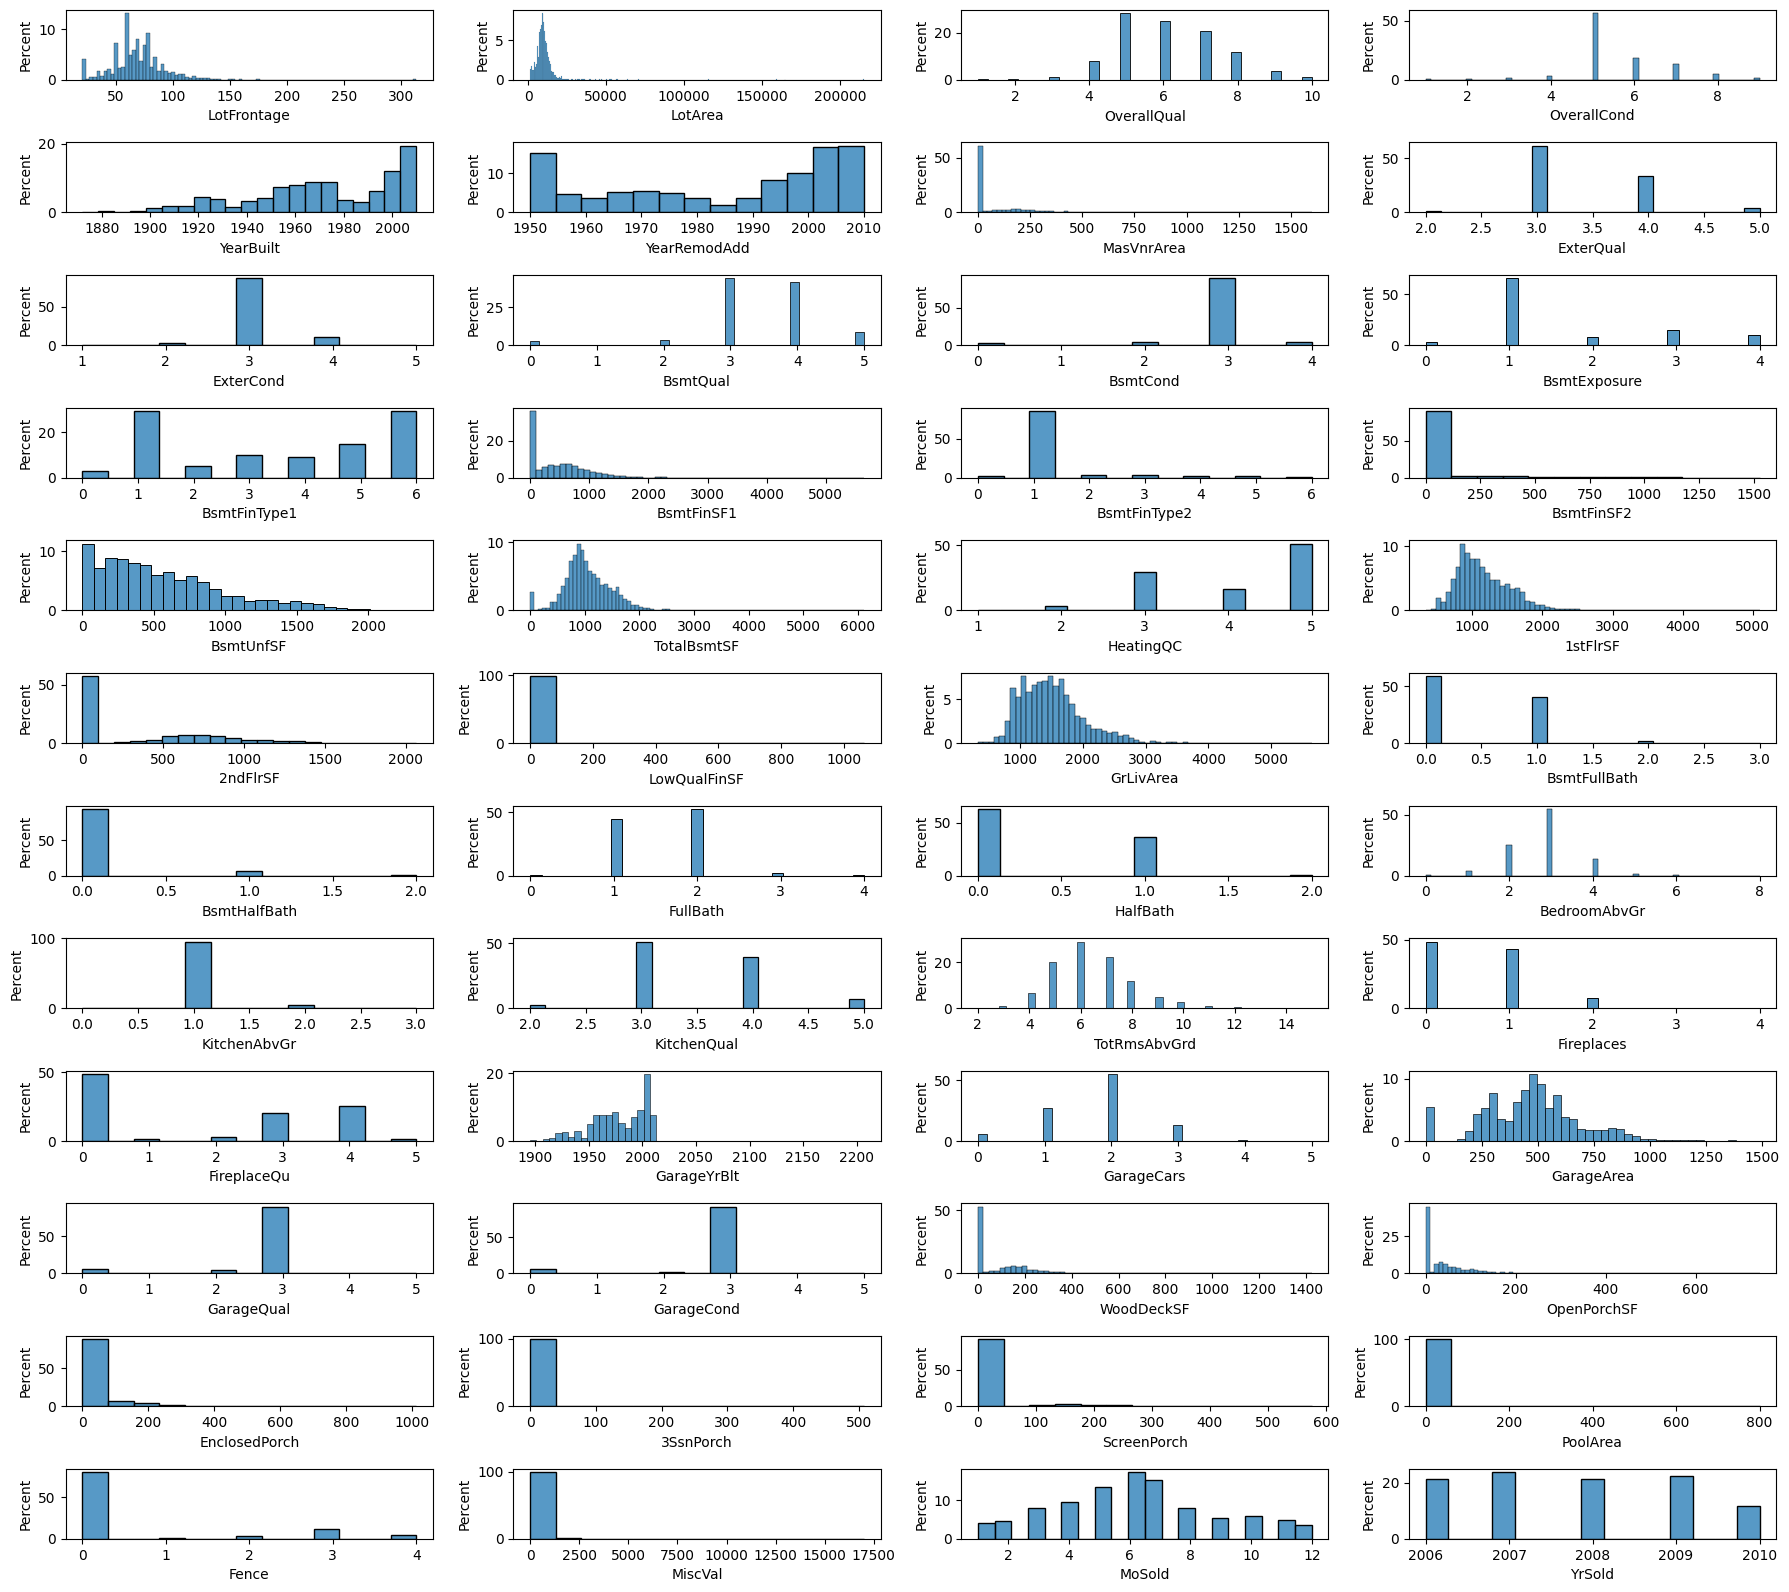

In [144]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(numerical_cols):
    plt.subplot(12,4,index+1)
    sns.histplot(X_all[numerical_cols].loc[:,col].dropna(), stat="percent")
fig.tight_layout(pad=1.0)

Some columns are highly skewed: '**BsmtFinSF2**', '**LowQualFinSF**', '**KitchenAbvGr**', '**EnclosedPorch**', '**3SsnPorch**', '**ScreenPorch**', '**PoolArea**', '**MiscVal**'.
Let's check a threshold of 96% for one skewed value

In [145]:
overfit_num = []
for i in numerical_cols:
    counts = X_all[numerical_cols][i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X_all[numerical_cols]) * 100 > 96:
        overfit_num.append(i)

skewed_numerical_cols = list(overfit_num)

print("Skewed Numerical Columns:\n")
skewed_numerical_cols

Skewed Numerical Columns:



['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']

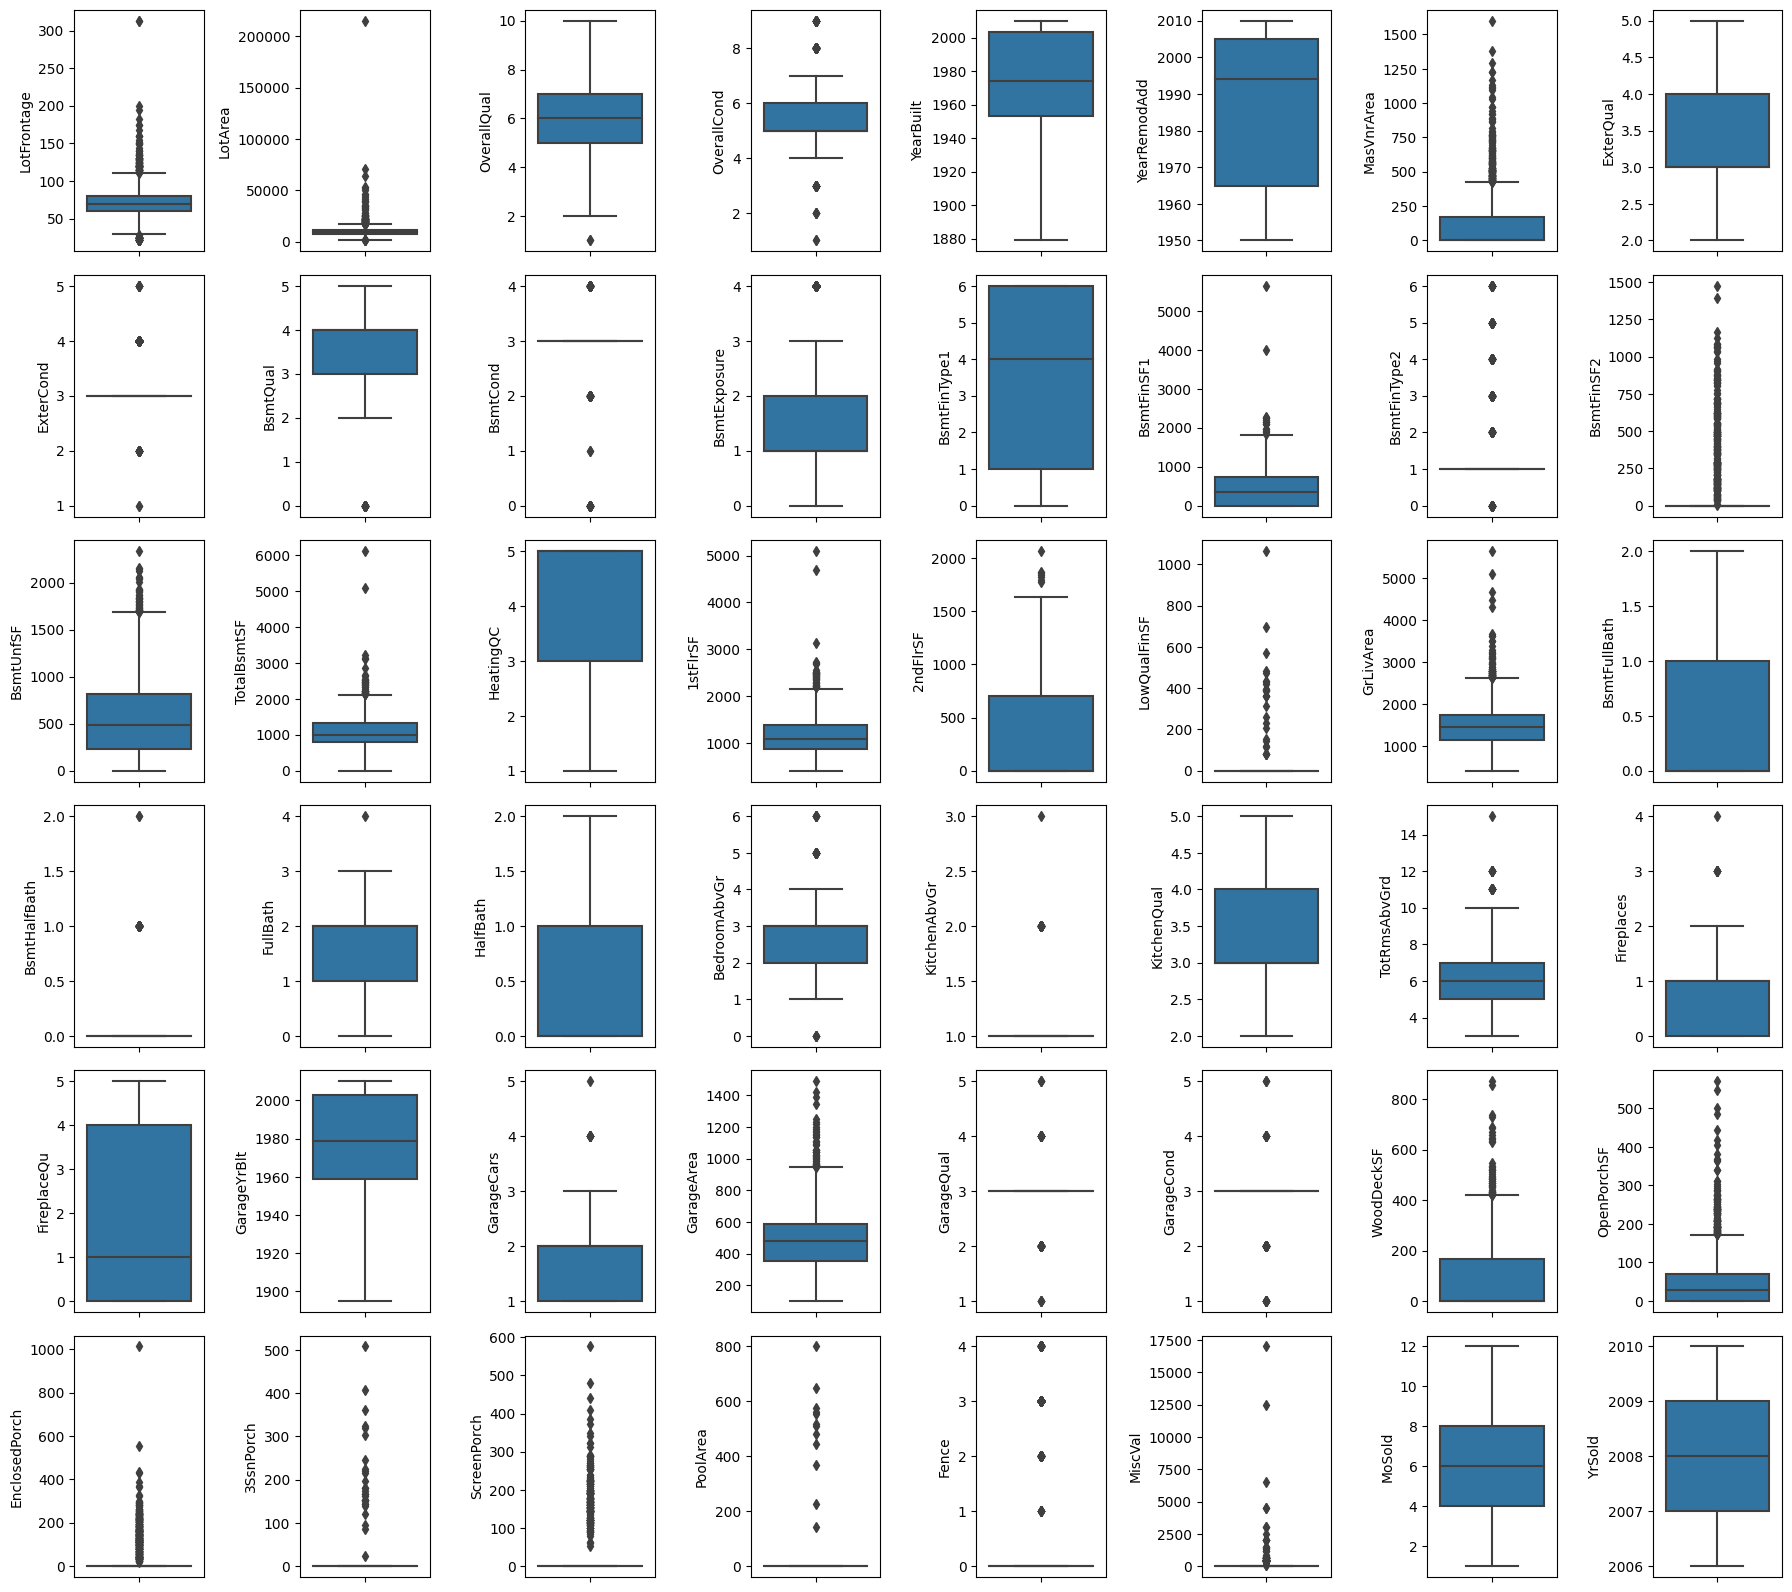

In [146]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(numerical_cols):
    plt.subplot(6,8,index+1)
    sns.boxplot(y=col, data=X_all[numerical_cols].dropna())
fig.tight_layout(pad=1.0)

Some Numerical columns have extreme outliers: 

### 2.3.Categorical Columns

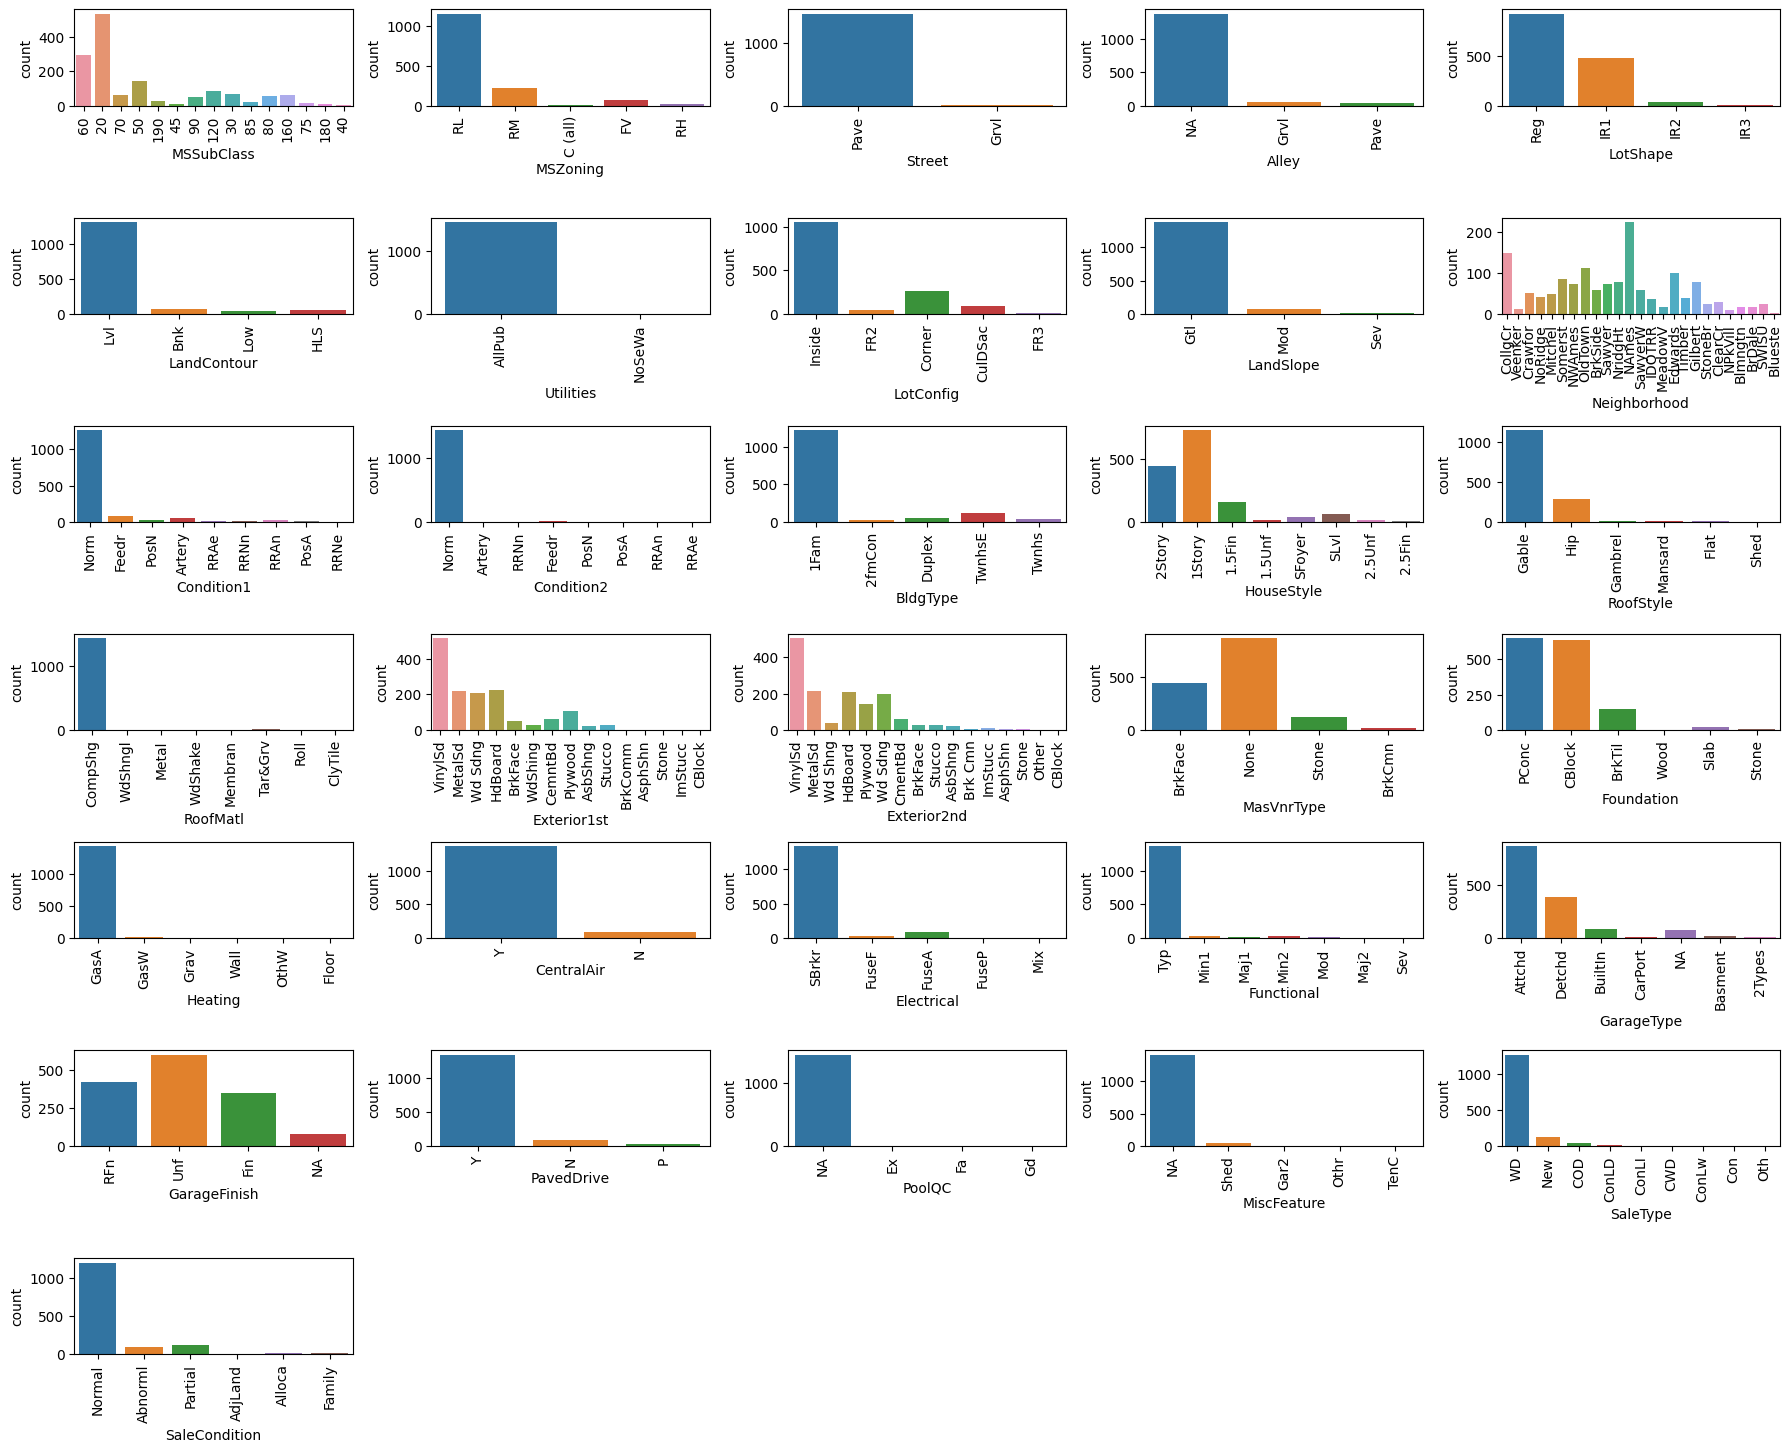

In [147]:
fig = plt.figure(figsize=(18,20))
for index, col in enumerate(df_train[categorical_cols].columns):
    plt.subplot(10,5,index+1)
    sns.countplot(x=df_train[categorical_cols].loc[:,col], data=df_train[categorical_cols].dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

Some columns are also highly skewed. Let's determine which are above the 96% threshold

In [148]:
overfit_cat = []
for i in categorical_cols:
    counts = X_all[categorical_cols][i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X_all[categorical_cols]) * 100 > 96:
        overfit_cat.append(i)

skewed_categorical_cols = list(overfit_cat)

print("Skewed Categorical Columns:\n")
skewed_categorical_cols

Skewed Categorical Columns:



['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'PoolQC',
 'MiscFeature']

### 2.4.Correlation Analysis

First, we'll avaliate correlation between the **Numerical Columns**

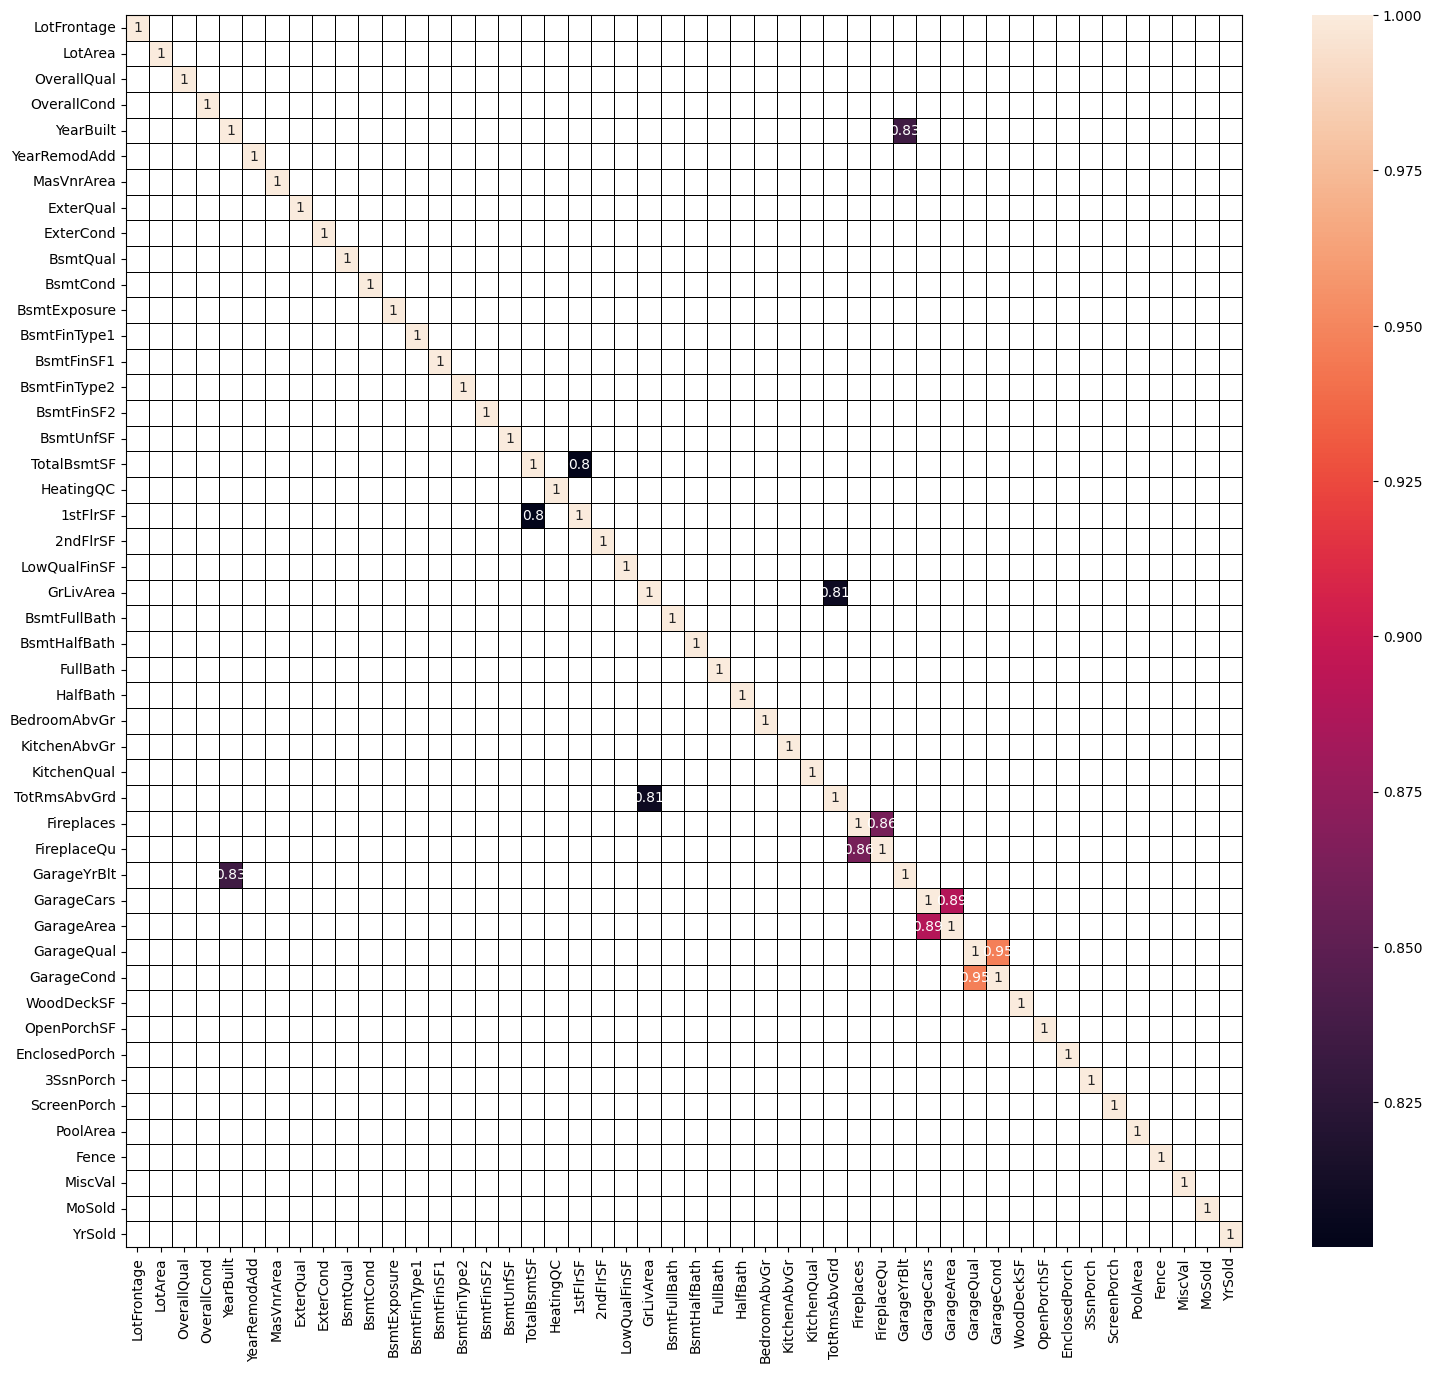

In [149]:
plt.figure(figsize=(18,16))
correlation = X_all[numerical_cols].corr()
ax = sns.heatmap(correlation, annot=True, mask = abs(correlation) < 0.8, linewidth= .5, linecolor='black')

# Set as Visible
for _, spine in ax.spines.items():
    spine.set_visible(True)

There is a high correlation in the following pairs:
- '**GarageYrBlt**' and '**YearBuilt**'
- '**TotRmsAbvGrd**' and '**GrLivArea**'
- '**1stFlrSF**' and '**TotalBsmtSF**'
- '**GarageArea**' and '**GarageCars**'
- '**FireplaceQu**' and '***Fireplaces***'
- '**GarageCond**' and '**GarageQual**'

Now, let's check correlation of **Numerical Columns** with Target '**SalePrice**'

In [150]:
correlation = df_train[numerical_cols + ['SalePrice']].corr().abs()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExterQual,0.682639
KitchenQual,0.659600
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
BsmtQual,0.585207


We can see that '**PoolArea**', '**OverallCond**', '**MoSold**', '**3SsnPorch**', '**YrSold**', '**LowQualFinSF**', '**MiscVal**', '**BsmtHalfBath**', '**BsmtFinSF2**' and '**BsmtFinType2***' have correlation lower than 0.1

## 3.Data Processing

Now, we'll start processing the data properly based on the EDA

### 3.1.Removal of Columns

Let's remove **Highly Skewed** columns based on the EDA

In [151]:
remove_skewed_train_cols = [col for col in skewed_numerical_cols + skewed_categorical_cols if col not in df_train.columns]
remove_skewed_test_cols = [col for col in skewed_numerical_cols + skewed_categorical_cols if col not in df_test.columns]


df_train = df_train.drop(remove_skewed_train_cols, axis=1)
df_train = df_train.drop(remove_skewed_test_cols, axis=1)

In [152]:
print(f"Columns:{len(df_train.columns)}")
df_train.columns

Columns:80


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Now, we will remove Columns with **Low Correlation with Target 'SalePrice'**. The threshold will be 0.05.

In [153]:
low_corr_cols = ['MoSold', '3SsnPorch', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2']

df_train = df_train.drop([col for col in low_corr_cols if col in df_train.columns], axis=1)
df_test = df_test.drop([col for col in low_corr_cols if col in df_test.columns], axis=1)


In [154]:
print(f"Columns:{len(df_train.columns)}")
df_train.columns

Columns:73


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Sc

Now, let's revise **Highly Correlated Columns**

From the correlation matrix, let's analyse each pair. We'll remove:
- 'GarageYrBlt' due to its lower correlation with 'SalePrice'
- 'TotRmsAbvGrd' due to its lower correlation with 'SalePrice'
- '1stFlrSF' due to its lower correlation with 'SalePrice'
- 'GarageArea' due to its lower correlation with 'SalePrice'
- 'Fireplaces' due to its lower correlation with 'SalePrice'
- 'GarageCond' due to its lower correlation with 'SalePrice'

In [155]:
df_train = df_train.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea', 'Fireplaces', 'GarageCond'], axis=1)
df_test = df_test.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea', 'Fireplaces', 'GarageCond'], axis=1)

print(f"Columns:{len(df_train.columns)}")
df_train.columns

Columns:67


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'

### 3.2. Outliers

Now, we'll check outliers in the Numerical Columns. The idea is to remove Rows with extreme outliers based on Quartile +- 3*IQR

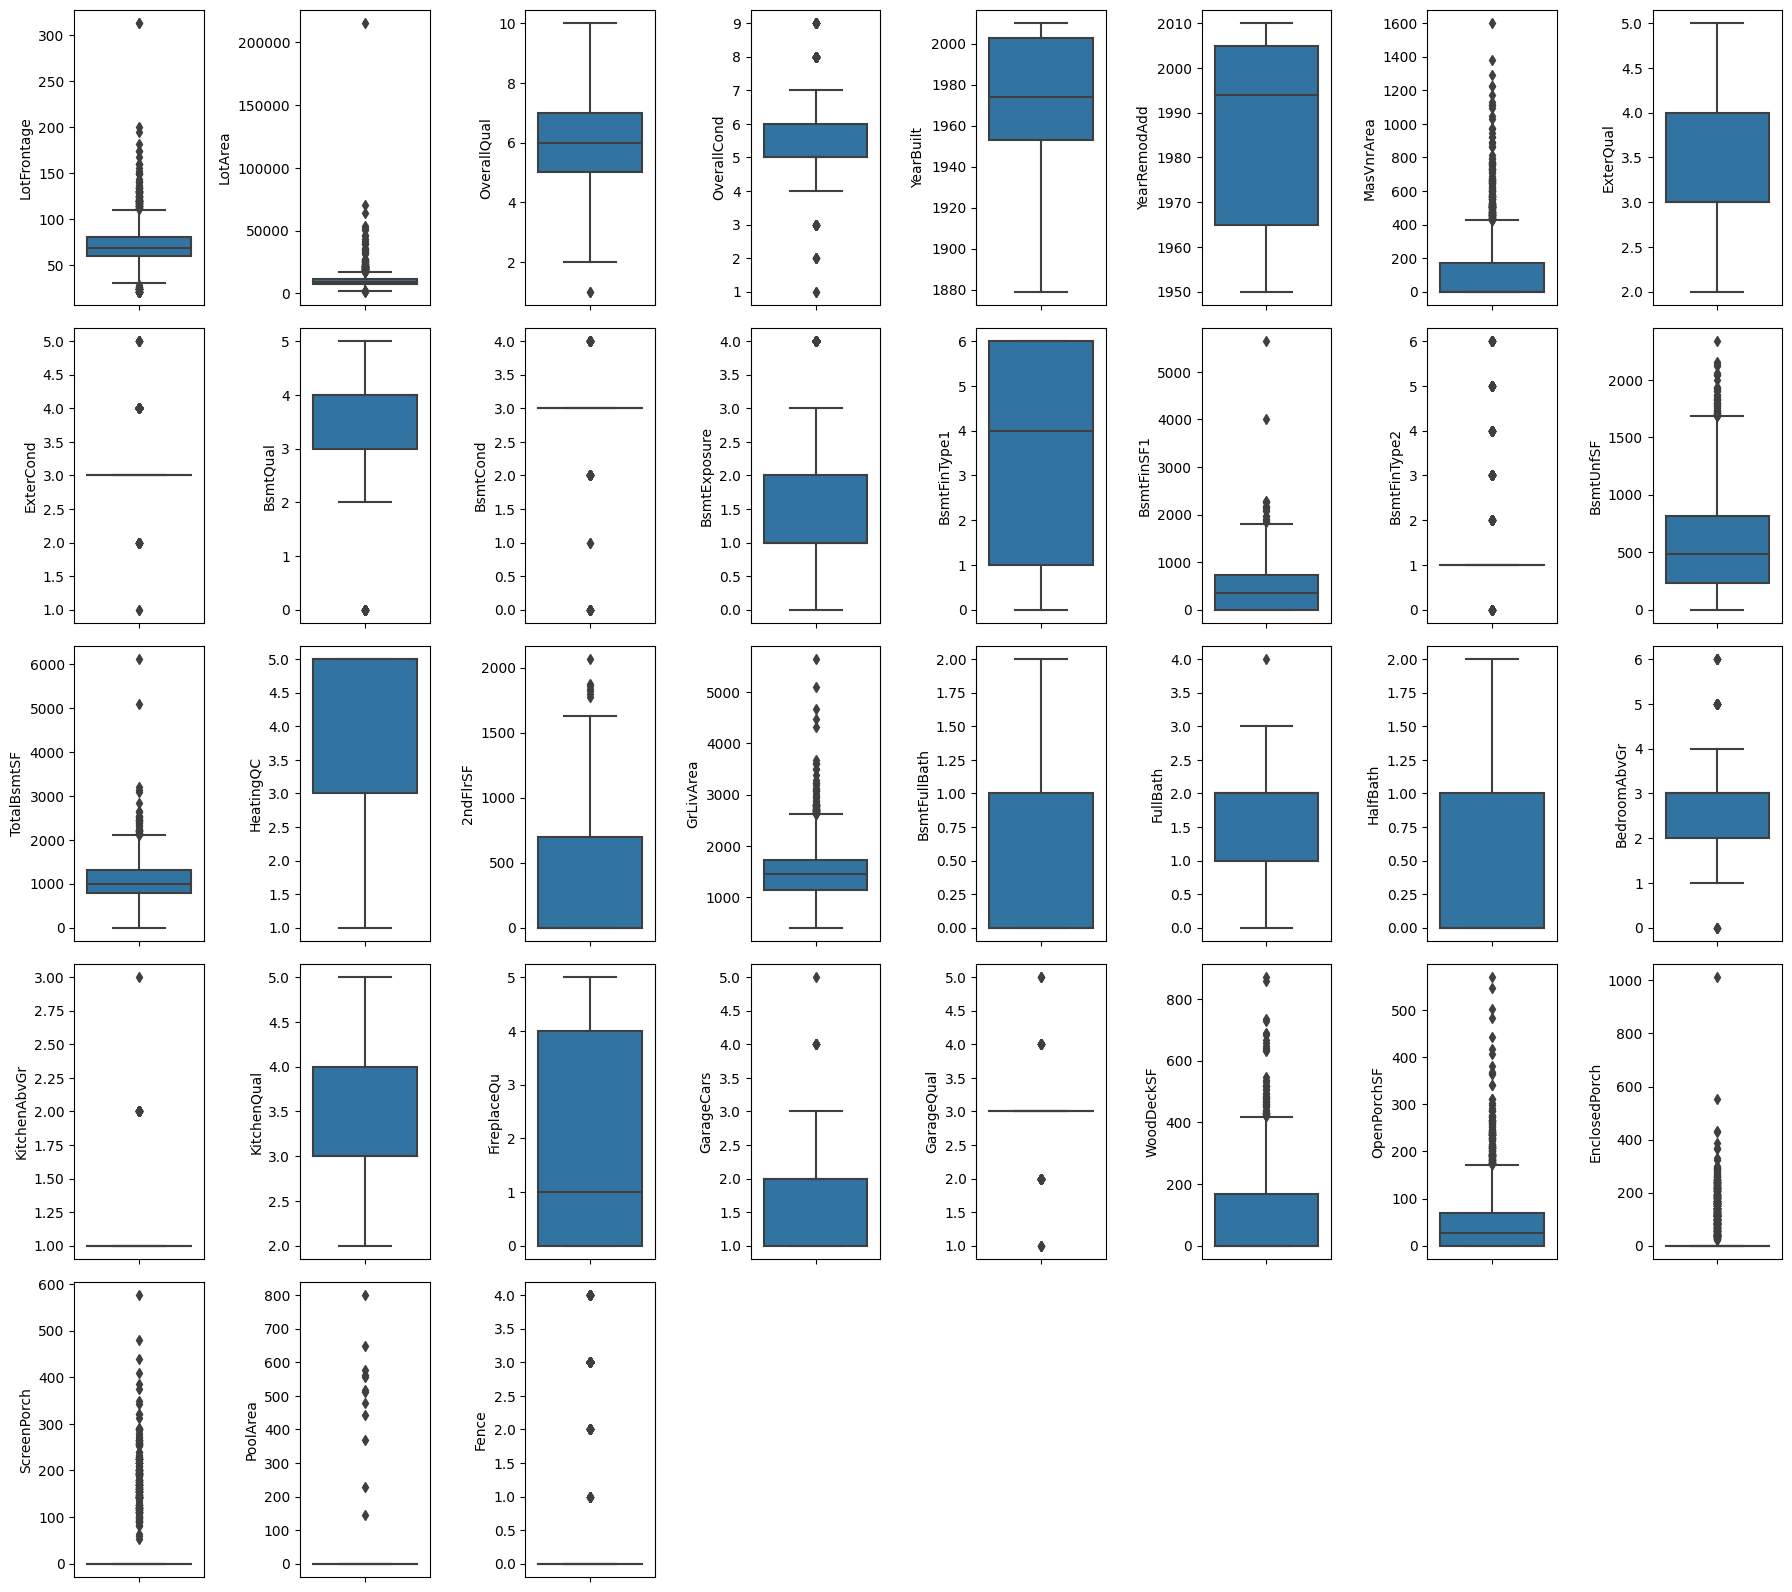

In [156]:
# Plot Columns still not removed

fig = plt.figure(figsize=(18,16))
for index,col in enumerate([col for col in numerical_cols if col in df_train.columns]):
    plt.subplot(5,8,index+1)
    sns.boxplot(y=col, data=X_all[numerical_cols].dropna())
fig.tight_layout(pad=1.0)

We will remove outlier for the '**LotFrontage**','**LotArea**','**BsmtFinSF1**','**TotalBsmtSF**','**GrLivArea**', which have a great count of extreme outliers values.

df_train shape:

(1170, 67)


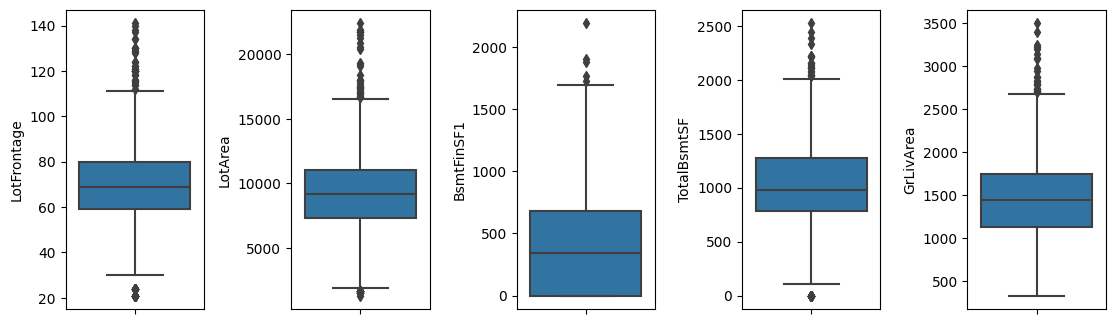

In [157]:
# Removing Outliers based on Quartile +- 3 * IQR

fig = plt.figure(figsize=(18,16))
for index,col in enumerate([col for col in ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea'] if col in df_train.columns]):
    #print(df_train[[col]].quantile([0.25, 0.75]).values.T)
    q1, q3 = df_train[[col]].quantile([0.25, 0.75]).values.T[0]
    iqr = q3-q1
    df_train = df_train[(df_train[col] < q3 + 3*iqr) & (df_train[col] > q1 - 3*iqr)]
    
    plt.subplot(5,8,index+1)
    sns.boxplot(y=col, data=df_train[[col for col in numerical_cols if col in df_train.columns]].dropna())
    
fig.tight_layout(pad=1.0)

print("df_train shape:\n")
print(df_train.shape)

### 3.3 Missing Values

Let's check the remaining missing values.

In [158]:
a = df_train.isna().sum(axis = 0)
a[a > 0]

MasVnrArea    6
Electrical    1
dtype: int64

MasVnrArea
count    1170.000000
mean       99.026496
std       176.743652
min         0.000000
25%         0.000000
50%         0.000000
75%       156.750000
max      1600.000000
Name: MasVnrArea, dtype: float64


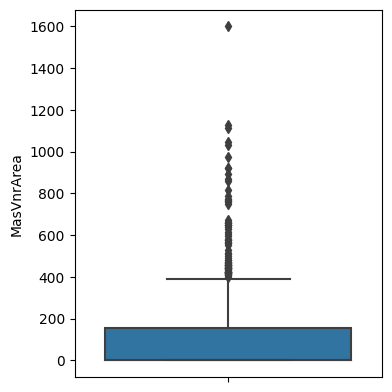

In [165]:
print("MasVnrArea")
print(df_train['MasVnrArea'].describe())

fig = plt.figure(figsize=(4,4))
sns.boxplot(y='MasVnrArea', data=df_train)
fig.tight_layout(pad=1.0)

In [160]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

Electrical
count      1170
unique        5
top       SBrkr
freq       1062
Name: Electrical, dtype: object


<Axes: xlabel='Electrical', ylabel='count'>

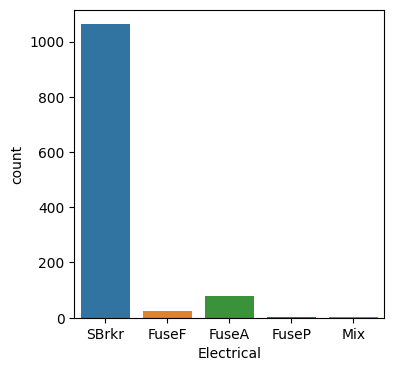

In [166]:
print("Electrical")
print(df_train['Electrical'].describe())

fig = plt.figure(figsize=(4,4))
sns.countplot(x=df_train[categorical_cols].loc[:,"Electrical"], data=df_train["Electrical"])

In [162]:
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

In [163]:
a = df_train.isna().sum(axis = 0)
a[a > 0]

Series([], dtype: int64)

Now, we have resolved the missing values issue

## 4. Prediction Model

### 4.1. Preprocessing

Let's define a strategy to preprocess the data.